<a href="https://colab.research.google.com/github/dineshglb/Machine-Learning/blob/main/LogisticRegression_Insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import metrics

In [ ]:
df = pd.read_csv("/content/insurance_data - Copy.csv")
df.head()
df.shape

(13, 2)

In [ ]:
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]

In [ ]:
x

In [ ]:
y

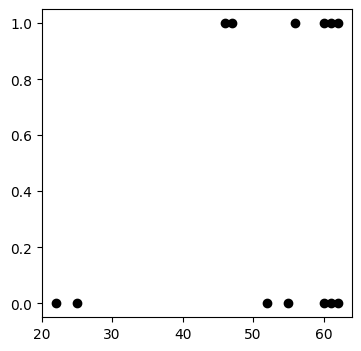

In [ ]:
plt.figure(figsize=(4, 4))
plt.scatter(df.age,df.bought_insurance,color='black')


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.5,random_state=8)

In [ ]:
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [ ]:
y_predicted = model.predict(x_test)

In [ ]:
model.coef_

array([[0.13076265]])

In [ ]:
model.intercept_

array([-3.67549475])

In [ ]:
model.score(x_test,y_test)

0.42857142857142855

In [ ]:
accuracy_score(y_test, y_predicted)

0.42857142857142855

In [ ]:
x_test, y_test

(    age
 7    60
 10   60
 11   62
 8    62
 6    55
 12   61
 0    22,
 7     1
 10    0
 11    0
 8     1
 6     0
 12    0
 0     0
 Name: bought_insurance, dtype: int64)

In [ ]:
y_predicted

array([1, 1, 1, 1, 1, 1, 0])

In [ ]:
c= confusion_matrix(y_predicted, y_test)
c

array([[1, 0],
       [4, 2]])

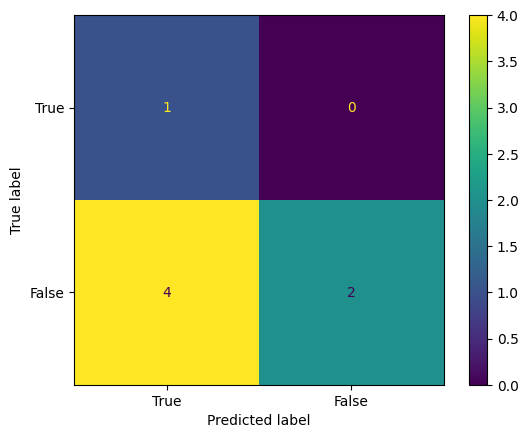

In [ ]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = c, display_labels = [True, False])

cm_display.plot()

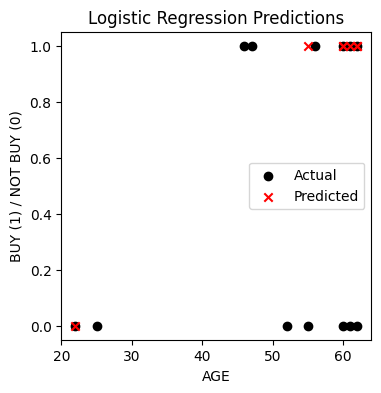

In [ ]:
### Plot the logistic regression curve
plt.figure(figsize=(4, 4))
plt.scatter(x, y, color='black', label='Actual')
plt.scatter(x_test, y_predicted, color='red', marker='x', label='Predicted')
plt.title('Logistic Regression Predictions')
plt.xlabel('AGE')
plt.ylabel('BUY (1) / NOT BUY (0)')
plt.legend(loc=7)
plt.show()

In [ ]:
x_test,y_test

(    age
 22   40
 0    22
 7    60
 18   19
 14   49
 4    46,
 22    1
 0     0
 7     1
 18    0
 14    1
 4     1
 Name: bought_insurance, dtype: int64)

30


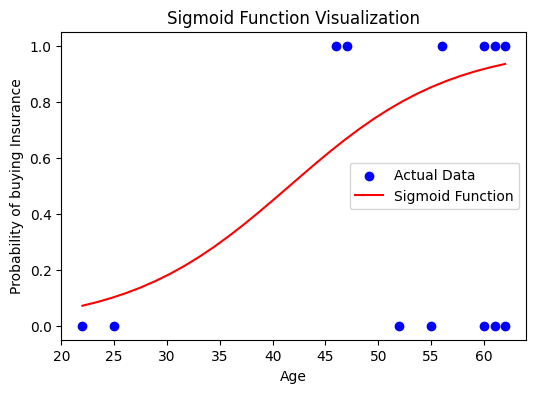

In [ ]:
# Draw the sigmoid function

def sigmoid(x_test):

    return 1 / (1 + np.exp(-x_test))

# Generate values for x
x_values = np.linspace(min(x_test['age']), max(x_test['age']), 30)
a=np.count_nonzero(x_values)
print(a)

# Calculate corresponding y values using the sigmoid function
y_values = sigmoid(model.coef_[0][0] * x_values + model.intercept_[0])

# Plot the sigmoid function
plt.figure(figsize=(6, 4))
plt.scatter(x['age'], y, color='blue', label='Actual Data')
plt.plot(x_values, y_values, color='red', label='Sigmoid Function')
plt.title('Sigmoid Function Visualization')
plt.xlabel('Age')
plt.ylabel('Probability of buying Insurance')
plt.legend(loc=7)
plt.show()

In [ ]:
age = float(input("Enter the age: "))
user_input = np.array([[age]])

user_prediction = model.predict(user_input)
result = 'BUY' if user_prediction == 1 else 'NOT BUY'

print(f"\nBased on {age} the person's age, the model predicts: {result}")